In [183]:

# SVM - Drug  Data set
#Given historical data of patients, and their response to different medications.

In [49]:

import matplotlib.pyplot as plt
import csv
from sklearn.svm import SVC
from sklearn import svm
import pandas as pd


In [50]:

#Download the csv from the url to C:\
import requests
url="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv"
req = requests.get(url)
url_content = req.content
csv_file = open('C:/Users/sures/Desktop/drug_csv.csv', 'wb')
csv_file.write(url_content)
csv_file.close()



In [97]:
#Read the csv from C:\
my_data = pd.read_csv("./drug_csv.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [98]:
# X value with all the features except the target drug field
#y is the target drug field that is to be prediced by the model.
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

In [ ]:
# The above data set can be used to train the SVM by splitting it 
#into train and test data set. We can then predict the accuracy of the model on the
#test data set.

In [99]:

#Convert string values into equivalent numeric
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [127]:
#Create a dictionary for y
drug = {'drugA': 1,'drugB':2,'drugC':3,'drugX':4,'drugY': 5} 

In [128]:
#Replace the drug with numeric
my_data.Drug=[drug[item] for item in my_data.Drug] 

In [129]:
y=my_data['Drug'].values
y[0:5]

array([5, 3, 3, 4, 5], dtype=int64)

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
#Split  the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(160, 5) (160,)
(40, 5) (40,)


In [132]:
#Search best fit parameters for the train data set
from sklearn.model_selection import GridSearchCV
from sklearn import svm


#set up parameters to iterate over
parameters = {'kernel':('linear', 'rbf','poly'),
                'C':[0.0001, 0.001, 0.01, 0.1, 1],
                'gamma':[0.0001, 0.001, 0.01, 0.1, 1]
              }

clf = GridSearchCV(svm.SVC(), parameters)

from sklearn.preprocessing import MultiLabelBinarizer  

clf.fit(X_train, y_train) #iterate over all configurations

print("Best parameters:", clf.best_params_)


Best parameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}


In [133]:
#Fit the train dataset with the best parameters.
svm = SVC(C=1, kernel='linear', gamma=0.0001)

svm.fit(X_train,y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
#Predict using the SVM model on test dataset
yhat = svm.predict(X_test)


In [135]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("SVM accuracy on test data set: ", metrics.accuracy_score(y_test, yhat))

SVM accuracy on test data set:  0.975


<div href="pre-processing">
    <h2>Evaluation metrics</h2>
</div>

In [136]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [137]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          1       0.86      1.00      0.92         6
          2       1.00      0.67      0.80         3
          3       1.00      1.00      1.00         5
          4       1.00      1.00      1.00        11
          5       1.00      1.00      1.00        15

avg / total       0.98      0.97      0.97        40

Normalized confusion matrix
[[1.   0.   0.   0.   0.  ]
 [0.33 0.67 0.   0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   1.  ]]


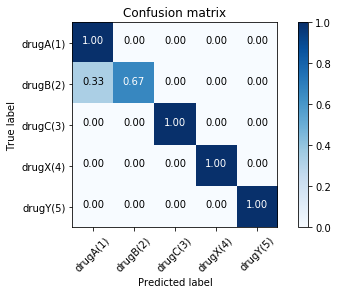

In [139]:
import numpy as np
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()     
plot_confusion_matrix(cnf_matrix, classes=['drugA(1)','drugB(2)','drugC(3)','drugX(4)','drugY(5)'],normalize= True,  title='Confusion matrix')

In [ ]:
#References :
#IBM Developer Skills Network - Labs. (2020).
#Retrieved 16 April 2020, from https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/coursera/ML0101EN/ML0101EN-Clas-SVM-cancer-py-v1.ipynb